# Webscraping allrecipes.com
<b>Edie Espejo</b>
<br>
2017-09-15 | 2017-09-07

<b>Link</b>: http://allrecipes.com/recipes/343/bread/quick-bread/fruit-bread/banana-bread/?internalSource=hubcard&referringContentType=search%20results&clickId=cardslot%201

# Install BeautifulSoup

In [2]:
# import pip
# pip.main(["install", "bs4"])

  Running setup.py bdist_wheel for bs4: started
  Running setup.py bdist_wheel for bs4: finished with status 'done'
  Stored in directory: C:\Users\ehze\AppData\Local\pip\Cache\wheels\84\67\d4\9e09d9d5adede2ee1c7b7e8775ba3fbb04d07c4f946f0e4f11
Successfully built bs4


0

In [12]:
# pip.main(["install", "requests_cache"])

0

In [182]:
# import pip
# pip.main(["install", "time"])

  Could not find a version that satisfies the requirement time (from versions: )
No matching distribution found for time


1

In [ ]:
# import time 
# while True:
#     print("This prints once a minute.")
#     time.sleep(60)   # Delay for 1 minute (60 seconds).

In [1]:
# IMPORTANT LIBRARIES
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import requests_cache
import os

In [2]:
os.getcwd()

'C:\\Users\\ehze\\Documents'

### Don't forget to CACHE!

In [3]:
# START CACHING
requests_cache.install_cache("C://Users/ehze/Documents/banana_cache_money")

# Collect Links
It seems that the links are formatted in this fashion:
http://allrecipes.com/recipes/343/bread/quick-bread/fruit-bread/banana-bread/?internalSource=hubcard&referringContentType=search%20results&clickId=cardslot%201&page=5#5

where we can replace the last numbers to resemble integers from 2 to 9.

In [4]:
# FORMAT LINKS
home = "http://allrecipes.com"
base_link = home + "/recipes/343/bread/quick-bread/fruit-bread/banana-bread/?internalSource=hubcard&referringContentType=search%20results&clickId=cardslot%201&page="

all_links = [base_link+str(integer)+"#"+str(integer) for integer in range(1,10)]

In [5]:
all_links

['http://allrecipes.com/recipes/343/bread/quick-bread/fruit-bread/banana-bread/?internalSource=hubcard&referringContentType=search%20results&clickId=cardslot%201&page=1#1',
 'http://allrecipes.com/recipes/343/bread/quick-bread/fruit-bread/banana-bread/?internalSource=hubcard&referringContentType=search%20results&clickId=cardslot%201&page=2#2',
 'http://allrecipes.com/recipes/343/bread/quick-bread/fruit-bread/banana-bread/?internalSource=hubcard&referringContentType=search%20results&clickId=cardslot%201&page=3#3',
 'http://allrecipes.com/recipes/343/bread/quick-bread/fruit-bread/banana-bread/?internalSource=hubcard&referringContentType=search%20results&clickId=cardslot%201&page=4#4',
 'http://allrecipes.com/recipes/343/bread/quick-bread/fruit-bread/banana-bread/?internalSource=hubcard&referringContentType=search%20results&clickId=cardslot%201&page=5#5',
 'http://allrecipes.com/recipes/343/bread/quick-bread/fruit-bread/banana-bread/?internalSource=hubcard&referringContentType=search%20re

The markup sort of looks like this.

        <h3 class="grid-col__h3 grid-col__h3--recipe-grid">
            Chef John's Banana Bread
                <div class="grid-col__video">
                    <a href="/video/528/chef-johns-banana-bread/" data-internal-referrer-link='hub recipe' data-click-id='cardslot 1'><span class="icon--videoplay-small-white"></span></a>
                </div>
        </h3>

In [6]:
# FUNCTION TO RETRIEVE URLS FROM ONE PAGE
def one_page_recipes(url):
    soup = BeautifulSoup((requests.get(url)).text, "html.parser")
    page_recipes = soup.find_all("article", {"class", "grid-col--fixed-tiles"})
    
    # INITIALIZE LIST
    recipes = []
    for page in page_recipes:
        try:
            temp = page.find_all("a")[0]["href"]
            if temp.startswith("/"):
                recipes.append(temp)
        except:
            continue
                  
    return(recipes)

In [7]:
banana_bread_links = [one_page_recipes(this_link) for this_link in all_links]

In [11]:
# len(banana_bread_links)

In [16]:
# CONCATENATE LIST AND FORMAT UNIVERSAL LINKS
bblinks = [home+list_item for sublist in banana_bread_links for list_item in sublist if "video" not in list_item]

In [17]:
bblinks

['http://allrecipes.com/recipe/23082/janets-famous-banana-nut-bread/',
 'http://allrecipes.com/recipe/6765/4h-banana-bread/',
 'http://allrecipes.com/recipe/218541/caramel-macchiato-banana-bread/',
 'http://allrecipes.com/recipe/219967/chef-johns-banana-bread/',
 'http://allrecipes.com/recipe/7154/creamy-banana-bread/',
 'http://allrecipes.com/recipe/17252/chocolate-banana-bread/',
 'http://allrecipes.com/recipe/228442/raspberry-banana-bread/',
 'http://allrecipes.com/recipe/16999/grandmas-homemade-banana-bread/',
 'http://allrecipes.com/recipe/141933/banana-zucchini-bread/',
 'http://allrecipes.com/recipe/17652/banana-crumb-muffins/',
 'http://allrecipes.com/recipe/20144/banana-banana-bread/',
 'http://allrecipes.com/recipe/17066/janets-rich-banana-bread/',
 'http://allrecipes.com/recipe/6984/banana-sour-cream-bread/',
 'http://allrecipes.com/recipe/67937/extreme-banana-nut-bread-ebnb/',
 'http://allrecipes.com/recipe/15747/best-ever-banana-bread/',
 'http://allrecipes.com/recipe/1695

In [18]:
len(bblinks)

177

Now the links have been collected, let's continue on to check out how to read one of the pages.

# Gathering Page Information
We're going to inspect one of the pages, then create a function that can be generalized to retrieve:
<br>
(1) Recipe Name
<br>
(2) Star Rating & Review Count
<br>
(4) Ingredients
<br>
(5) Calories

In [19]:
bblinks[0]

'http://allrecipes.com/recipe/23082/janets-famous-banana-nut-bread/'

### Recipe Name
The markup for the recipe name looks like this. 

In [78]:
# <section class="recipe-summary clearfix">
#     <meta property="og:rating" content="4.41201734542847" />
#     <meta property="og:rating_scale" content="5" />
#     <div id="karma-lazy-sponsorLogo" class="recipe-summary__logo"></div>
#     <h1 class="recipe-summary__h1" itemprop="name">Strawnana Bread</h1>
#     <!--rating stars-->
#     <div class="recipe-summary__stars">
#         <div class="rating-stars" data-scroll-to-anchor="reviews" data-ratingstars= 4.41201734542847 >

In [77]:
#         <span itemprop="aggregateRating" itemscope itemtype="http://schema.org/AggregateRating" class="aggregate-rating">
#             <meta itemprop="ratingValue" content="4.41">
#             <meta itemprop="reviewCount" content="182">

In [20]:
soup = BeautifulSoup((requests.get(bblinks[0])).text, "html.parser")
clearfix = soup.find_all("section", {"class", "recipe-summary clearfix"})[0]

In [21]:
clearfix

<section class="recipe-summary clearfix">
<meta content="4.63492059707642" property="og:rating"/>
<meta content="5" property="og:rating_scale"/>
<div class="recipe-summary__logo" id="karma-lazy-sponsorLogo"></div>
<h1 class="recipe-summary__h1" itemprop="name">Janet's Famous Banana Nut Bread</h1>
<!--rating stars-->
<div class="recipe-summary__stars">
<div class="rating-stars" data-ratingstars="4.63492059707642" data-scroll-to-anchor="reviews">
<img height="20" src="http://images.media-allrecipes.com/ar-images/icons/rating-stars/full-star-2015.svg" width="20">
<img height="20" src="http://images.media-allrecipes.com/ar-images/icons/rating-stars/full-star-2015.svg" width="20">
<img height="20" src="http://images.media-allrecipes.com/ar-images/icons/rating-stars/full-star-2015.svg" width="20">
<img height="20" src="http://images.media-allrecipes.com/ar-images/icons/rating-stars/full-star-2015.svg" width="20">
<img height="20" src="http://images.media-allrecipes.com/ar-images/icons/rating

In [22]:
clearfix.find("h1").contents[0]

"Janet's Famous Banana Nut Bread"

### Star Rating & Review Count

In [23]:
clearfix.find("div", {"class": "recipe-summary__stars"}).find("div", {"class", "rating-stars"})["data-ratingstars"]

'4.63492059707642'

In [24]:
metas = clearfix.find("div", {"class": "recipe-summary__stars"}).find("span", {"class", "aggregate-rating"}).find_all("meta")

In [25]:
metas

[<meta content="4.63" itemprop="ratingValue"/>,
 <meta content="110" itemprop="reviewCount"/>]

In [114]:
[h["content"] for h in metas]

['4.41', '182']

### Ingredients

In [26]:
#   <ul class="checklist dropdownwrapper list-ingredients-1" ng-hide="reloaded" id="lst_ingredients_1">
#                 <li class="checkList__line">
#                     <label ng-class="{true: 'checkList__item'}[true]">
#                         <input data-id="16317" name="ingredientCheckbox" data-role="none" type="checkbox" value="N" ng-click="saveIngredient($event,16317)" />
#                         
#                     </label>
#                         <div data-ng-repeat='deal in deals["16317"]'>
#                             <div class="offer-container" data-ng-class='{"hide-deals":!deals["16317"] || !localOffersService.localOffersUserEnabled()}' ng-cloak>
#                                 <div class="left">
#                                     <p>
#                                         <span class="offer-name" data-ng-bind-html='deal.description'></span>
#                                         <br/>
#                                         <span ng-show='deal.isBIU' data-ng-bind-html='deal.price'></span>
#                                         <span ng-show='!deal.isBIU' class='unit-cost' data-ng-bind-html='deal.priceWithExpiration'></span>
#                                         <br/>
#                                         <a data-no-follow-if-external ng-href='{{deal.actionUrl}}' target="_blank" data-ng-click='fireClickPixels(deal.clickPixels)' data-ng-bind-html='deal.clickThroughText'></a>
#                                         <br/>
#                                         <span class="advertisement" ng-show='deal.isBIU'>ADVERTISEMENT</span>
#                                     </p>
#                                     <div class="tracking-element" load-dom-script script="deal.moatUrl"></div>
#                                     <img class="tracking-element" data-ng-repeat="trackingUrl in deal.trackingPixels track by $index" data-ng-src="{{trackingUrl}}" />
#                                     <img class="tracking-element" data-ng-repeat="clickUrl in listClickPixels track by $index" data-ng-src="{{clickUrl}}" />
#                                 </div>
#                                 <div class="right">
#                                     <img data-ng-src='{{deal.imageUrl}}' class="offer-photo" />
#                                 </div>
#                             </div>
#                         </div>
#                 </li>
#                 <li class="checkList__line">
#                     <label ng-class="{true: 'checkList__item'}[true]">
#                         <input data-id="1526" name="ingredientCheckbox" data-role="none" type="checkbox" value="N" ng-click="saveIngredient($event,1526)" />
#                         <span class="recipe-ingred_txt added" data-id="1526" data-nameid="1526" itemprop="ingredients">2 cups white sugar</span>
#                     </label>
#                         <div data-ng-repeat='deal in deals["1526"]'>
#                             <div class="offer-container" data-ng-class='{"hide-deals":!deals["1526"] || !localOffersService.localOffersUserEnabled()}' ng-cloak>
#                                 <div class="left">
#                                     <p>
#                                         <span class="offer-name" data-ng-bind-html='deal.description'></span>
#                                         <br/>
#                                         <span ng-show='deal.isBIU' data-ng-bind-html='deal.price'></span>
#                                         <span ng-show='!deal.isBIU' class='unit-cost' data-ng-bind-html='deal.priceWithExpiration'></span>
#                                         <br/>
#                                         <a data-no-follow-if-external ng-href='{{deal.actionUrl}}' target="_blank" data-ng-click='fireClickPixels(deal.clickPixels)' data-ng-bind-html='deal.clickThroughText'></a>
#                                         <br/>
#                                         <span class="advertisement" ng-show='deal.isBIU'>ADVERTISEMENT</span>
#                                     </p>
#                                     <div class="tracking-element" load-dom-script script="deal.moatUrl"></div>
#                                     <img class="tracking-element" data-ng-repeat="trackingUrl in deal.trackingPixels track by $index" data-ng-src="{{trackingUrl}}" />
#                                     <img class="tracking-element" data-ng-repeat="clickUrl in listClickPixels track by $index" data-ng-src="{{clickUrl}}" />
#                                 </div>
#                                 <div class="right">
#                                     <img data-ng-src='{{deal.imageUrl}}' class="offer-photo" />
#                                 </div>
#                             </div>
#                         </div>
#                 </li>

In [27]:
# <span class="recipe-ingred_txt added" data-id="16317" data-nameid="16317" itemprop="ingredients">4 eggs, lightly beaten</span>

In [28]:
ingredients = soup.find_all("span", {"class", "recipe-ingred_txt added"})

In [29]:
len(ingredients)

10

In [30]:
[item.contents[0] for item in ingredients]

['3 cups white sugar',
 '3/4 cup butter, softened',
 '3 eggs',
 '2 cups mashed ripe banana',
 '1/2 cup sour cream',
 '3 1/2 cups all-purpose flour',
 '1 teaspoon baking soda',
 '1/2 teaspoon baking powder',
 '1/2 teaspoon ground cinnamon',
 '1 1/2 cups chopped pecans']

### Number of Ratings

In [31]:
# <span class="calorie-count" ng-class="{'active': nutritionSection_showing}"><span>258</span> <span class="calorie-count__desc" ng-class="{'active': nutritionSection_showing}"> cals</span></span>

In [38]:
soup.find("h4", {"class", "helpful-header"}).contents[0]

'126 Ratings'

### Calories

In [39]:
soup.find_all("span", {"class", "calorie-count"})[0].find("span").contents[0]

'356'

### Function To Retrieve All
Now, what remains is the task to make a function to wrangle these data from a generic page!

In [ ]:
# def read_a_page(url):
#     # CONVERT PAGE
#     soup = BeautifulSoup((requests.get(url)).text, "html.parser")
    
#     # RECIPE TITLE
#     try:
#         clearfix = soup.find_all("section", {"class", "recipe-summary clearfix"})[0]
#         title = clearfix.find("h1").contents[0]
#     except:
#         print(url)

#     # RATINGS
#     try:
#         longRating = clearfix.find("div", {"class": "recipe-summary__stars"}).find("div", {"class", "rating-stars"})["data-ratingstars"]
#         metas = clearfix.find("div", {"class": "recipe-summary__stars"}).find("span", {"class", "aggregate-rating"}).find_all("meta")
#         metas_content = [h["content"] for h in metas]
#         ratingValue, reviewCount = metas_content[0], metas_content[1]
#     except:
#         print(url)
    
#     # INGREDIENTS
#     try:
#         ingredients = soup.find_all("span", {"class", "recipe-ingred_txt added"})
#         recipe = [item.contents[0] for item in ingredients]
#     except:
#         print(url)
                         
#     # CALORIES
#     try:
#         calories = soup.find_all("span", {"class", "calorie-count"})[0].find("span").contents[0]
#     except:
#         print(url)
    
#     try:
#         return([title, longRating, ratingValue, reviewCount, recipe, calories])
#     except:
#         return(0)

In [45]:
def read_a_page(url):
    # CONVERT PAGE
    soup = BeautifulSoup((requests.get(url)).text, "html.parser")
    
    # RECIPE TITLE
    try:
        clearfix = soup.find_all("section", {"class", "recipe-summary clearfix"})[0]
        title = clearfix.find("h1").contents[0]
    except:
        title = np.NaN

    # RATINGS
    longRating = clearfix.find("div", {"class": "recipe-summary__stars"}).find("div", {"class", "rating-stars"})["data-ratingstars"]
    metas = clearfix.find("div", {"class": "recipe-summary__stars"}).find("span", {"class", "aggregate-rating"}).find_all("meta")
    metas_content = [h["content"] for h in metas]
    ratingValue, reviewCount = metas_content[0], metas_content[1]
    
    # INGREDIENTS
    ingredients = soup.find_all("span", {"class", "recipe-ingred_txt added"})
    recipe = [item.contents[0] for item in ingredients]
                         
    # CALORIES
    try:
        calories = soup.find_all("span", {"class", "calorie-count"})[0].find("span").contents[0]
    except:
        calories = np.NaN
    
    # NUMBER OF RATINGS
    try:
        ratings = soup.find("h4", {"class", "helpful-header"}).contents[0]
    except:
        ratings = np.NaN
    
    return([url, title, longRating, ratingValue, reviewCount, recipe, calories, ratings])                     
    

In [46]:
table = pd.DataFrame([read_a_page(this_link) for this_link in bblinks])

In [43]:
i = 0
table_tester = []
for this_link in bblinks:
    print(i)
    try:
        table_tester.append((read_a_page(this_link)))
    except:
        table_tester.append([np.NaN]*8)
    i = i + 1

In [49]:
table.columns = ["url", "title", "longRating", "ratingValue", "reviewCount", "recipe", "calories", "ratings"]

In [50]:
table

,url,title,longRating,ratingValue,reviewCount,recipe,calories,ratings
0,http://allrecipes.com/recipe/23082/janets-famo...,Janet's Famous Banana Nut Bread,4.63492059707642,4.63,110,"[3 cups white sugar, 3/4 cup butter, softened,...",356,126 Ratings
1,http://allrecipes.com/recipe/6765/4h-banana-br...,4H Banana Bread,4.67164182662964,4.67,881,"[2 cups all-purpose flour, 1/2 teaspoon baking...",265,1072 Ratings
2,http://allrecipes.com/recipe/218541/caramel-ma...,Caramel Macchiato Banana Bread,4.18181800842285,4.18,57,"[cooking spray, 2 cups all-purpose flour, 1 te...",334,66 Ratings
3,http://allrecipes.com/recipe/219967/chef-johns...,Chef John's Banana Bread,4.69473695755005,4.69,381,"[cooking spray, 2 cups all-purpose flour, 1 te...",334,475 Ratings
4,http://allrecipes.com/recipe/7154/creamy-banan...,Creamy Banana Bread,4.6641001701355,4.66,869,"[1/2 cup margarine, softened, 1 (8 ounce) pack...",289,1039 Ratings
5,http://allrecipes.com/recipe/17252/chocolate-b...,Chocolate Banana Bread,4.67378330230713,4.67,925,"[1 cup margarine, softened, 2 cups white sugar...",278,1171 Ratings
6,http://allrecipes.com/recipe/228442/raspberry-...,Raspberry Banana Bread,4.68292665481567,4.68,32,"[3/4 cup frozen unsweetened raspberries, thawe...",273,41 Ratings
7,http://allrecipes.com/recipe/16999/grandmas-ho...,Grandma's Homemade Banana Bread,4.69541788101196,4.70,312,"[1 1/2 cups white sugar, 1/2 cup butter, softe...",226,371 Ratings
8,http://allrecipes.com/recipe/141933/banana-zuc...,Banana-Zucchini Bread,4.51702785491943,4.52,263,"[3 eggs, 3/4 cup vegetable oil, 2/3 cup packed...",272,323 Ratings
9,http://allrecipes.com/recipe/17652/banana-crum...,Banana Crumb Muffins,4.803551197052,4.80,9640,"[1 1/2 cups all-purpose flour, 1 teaspoon baki...",263,13123 Ratings


In [51]:
table.to_csv("banana_bread_df.csv")

In [68]:
table["calories"][50]

'232'

NUMBER 47 IS A BITCH

In [79]:
ghetto = [int(x) for x in table["calories"][0:46]] + [int(x) for x in table["calories"][48:]]

In [88]:
ghetto

[99,
 101,
 109,
 127,
 127,
 128,
 130,
 131,
 132,
 137,
 145,
 148,
 149,
 159,
 160,
 164,
 167,
 168,
 169,
 169,
 171,
 175,
 177,
 178,
 179,
 181,
 182,
 182,
 185,
 188,
 188,
 190,
 193,
 195,
 196,
 196,
 196,
 197,
 200,
 201,
 204,
 205,
 205,
 205,
 208,
 208,
 209,
 210,
 214,
 215,
 215,
 215,
 216,
 218,
 218,
 218,
 221,
 223,
 224,
 225,
 226,
 226,
 229,
 229,
 231,
 232,
 232,
 232,
 234,
 234,
 236,
 237,
 237,
 239,
 246,
 247,
 247,
 248,
 248,
 249,
 249,
 250,
 252,
 253,
 254,
 254,
 255,
 256,
 258,
 258,
 261,
 263,
 263,
 263,
 264,
 264,
 265,
 265,
 266,
 266,
 267,
 268,
 270,
 270,
 270,
 272,
 272,
 272,
 273,
 273,
 273,
 277,
 278,
 278,
 279,
 281,
 286,
 289,
 292,
 292,
 293,
 296,
 298,
 298,
 301,
 303,
 305,
 307,
 308,
 311,
 312,
 320,
 324,
 327,
 327,
 328,
 334,
 334,
 334,
 334,
 336,
 339,
 341,
 345,
 346,
 347,
 348,
 354,
 355,
 355,
 356,
 356,
 366,
 367,
 371,
 374,
 378,
 380,
 381,
 381,
 387,
 389,
 389,
 391,
 415,
 427,
 436,

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

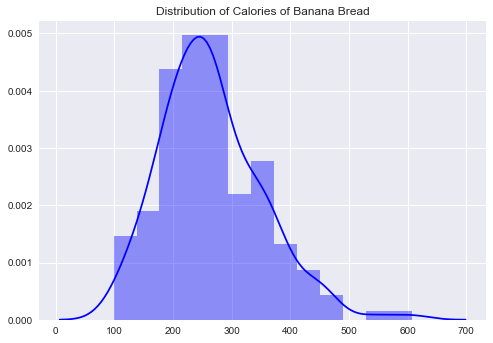

In [99]:
# SCORE DISTRIBUTION HISTOGRAM
x = pd.Series(ghetto)

sns.distplot(x, color="blue")
plt.title("Distribution of Calories of Banana Bread")

sns.plt.show()

In [102]:
np.mean(ghetto)

265.54285714285714

In [104]:
np.std(ghetto)

86.048870784370592